In [42]:
#インポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

In [30]:
#scikit learnのload_filesを使う
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer

#レビューテキストファイル集合を読み込む
reviews = load_files("ml_data/", decode_error='ignore', encoding='utf-8')
# print(reviews)
review_text, review_label = reviews.data, reviews.target

# #テキストファイルの数を確認
print("the number of files: {}\n".format(len(review_text)))
print("the number of files: {}\n".format(len(review_label)))

# #クラス（pos, neg)ごとのファイルの数を確認
# print("the number of files  per class: {}\n".format(np.bincount(review_label)))

# #各テキストファイルごとに正規表現でhtml改行タグをスペースに置換
# review_text = [doc.replace(b"<br />", b" ") for doc in review_text]


review_vect = CountVectorizer(min_df=2,stop_words="english").fit(review_text)
review_bow = review_vect.transform(review_text)

the number of files: 584

the number of files: 584



In [31]:
# #CountVectorizerでTokenizationと辞書構築を行う
# from sklearn.feature_extraction.text import CountVectorizer
# review_vect = CountVectorizer()
# review_vect.fit(review_text)

#辞書のサイズを確認
print("Vocabulary size: {}\n".format(len(review_vect.vocabulary_)))

#辞書の中身を確認
review_features = review_vect.get_feature_names()
print("Number of features: {}\n".format(len(review_features)))
print("First 30 features:\n{}\n".format(review_features[:30]))

print("1000 - 1100 features:\n{}\n".format(review_features[1000:1100]))

print("Features 10000 to 10030:\n{}\n".format(review_features[10000:10030]))
print("Features 20000 to 20030:\n{}\n".format(review_features[20000:20030]))

#テキストのBoW表現を構築（実際はSciPyの疎行列として格納）
review_bow = review_vect.transform(review_text)
print("bag_of_words: {}".format(repr(review_bow)))

Vocabulary size: 16350

Number of features: 16350

First 30 features:
['000', '040', '10', '100', '100th', '101', '105', '10th', '11', '110', '11th', '12', '120', '123', '125', '13', '130', '132', '134', '135', '137', '13th', '14', '140', '142', '145', '147', '1492', '14th', '15']

1000 - 1100 features:
['approaching', 'appropriate', 'appropriated', 'appropriately', 'approval', 'approve', 'approved', 'approximate', 'approximately', 'approximations', 'apps', 'april', 'aptly', 'aquaculture', 'aquarium', 'aquatic', 'aquatics', 'aquifer', 'ar', 'arab', 'arabia', 'arabic', 'arbitrary', 'arc', 'arcade', 'archaeological', 'archaeologist', 'archaeologists', 'archaeology', 'archaic', 'archeology', 'archer', 'archetype', 'archetypes', 'archimedes', 'architect', 'architects', 'architectural', 'architecture', 'archive', 'archived', 'archives', 'arctic', 'arduous', 'area', 'areas', 'aren', 'arena', 'argentina', 'argentine', 'argentinian', 'arguably', 'argue', 'argued', 'argues', 'arguing', 'argumen

In [34]:
#英語のストップワードリスト
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}\n".format(len(ENGLISH_STOP_WORDS)))
print("First 30 stopword:\n{}\n".format(list(ENGLISH_STOP_WORDS)[:30]))

#stop_wordsパラメータに"english"を指定すると上記の組み込みストップワードリストを使用
review_vect = CountVectorizer(min_df=2, stop_words="english").fit(review_text)
review_bow = review_vect.transform(review_text)
print("bag_of_words with df as 2 and stop words: {}".format(repr(review_bow)))

Number of stop words: 318

First 30 stopword:
['had', 'so', 'during', 'whole', 'latterly', 'mine', 'of', 'if', 'see', 'himself', 're', 'further', 'de', 'above', 'or', 'system', 'she', 'anyhow', 'down', 'toward', 'two', 'its', 'less', 'thus', 'bill', 'amongst', 'beyond', 'ltd', 'too', 'within']

bag_of_words with df as 2 and stop words: <584x16350 sparse matrix of type '<class 'numpy.int64'>'
	with 255928 stored elements in Compressed Sparse Row format>


In [37]:
#TfidfVectorizerでtfidfによるBoW表現を構築
#TfidfTransformerでCountVectorizerの疎行列を変換してもよい
from sklearn.feature_extraction.text import TfidfVectorizer
review_vect_tfidf =  TfidfVectorizer(min_df=2, stop_words="english").fit(review_text)
review_bow_tfidf = review_vect_tfidf.transform(review_text)
print("tf-idf bag_of_words with df as 2 and stop words: {}\n".format(repr(review_bow_tfidf)))

# tfidfの最大値を見つける:
max_value = review_bow_tfidf .max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# 辞書語を取得
feature_names = np.array(review_vect_tfidf.get_feature_names())

#tfidfの低い語を確認
print("Features with lowest tfidf:\n{}\n".format(
      feature_names[sorted_by_tfidf[:30]]))

#tfidfの高い語を確認
print("Features with highest tfidf: \n{}\n".format(
      feature_names[sorted_by_tfidf[-30:]]))

#idfの低い（dfの高い）語を確認
sorted_by_idf = np.argsort(review_vect_tfidf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:50]]))

tf-idf bag_of_words with df as 2 and stop words: <584x16350 sparse matrix of type '<class 'numpy.float64'>'
	with 255928 stored elements in Compressed Sparse Row format>

Features with lowest tfidf:
['gooey' 'mexicans' 'ion' 'roster' 'freer' 'patrol' 'reconsidered'
 'interdisciplinary' 'strains' 'globalized' 'designated' 'scottish' 'salts'
 'algal' 'twists' 'violates' 'vouchers' 'slack' 'cervantes' 'arose'
 'originate' 'departing' 'alberta' 'eventual' 'militaries' 'exceeding'
 'coordinates' 'argues' 'nun' 'brook']

Features with highest tfidf: 
['nonviolent' 'milk' 'fbi' 'microbes' 'autism' 'anatomy' 'ivan' 'water'
 'voting' 'em' 'cheers' 'flag' 'refugees' 'dna' 'bacteria' 'gaza' 'blah'
 'asteroids' 'sex' 'paul' 'bamboo' 'comet' 'trust' 'spelling' 'mars'
 'quantum' 'alzheimer' 'bees' 'hum' 'music']

Features with lowest idf:
['applause' 'like' 'just' 'thank' 'time' 'people' 'know' 'way' 'years'
 'don' 'make' 've' 'think' 'really' 'world' 'going' 'right' 'want' 'work'
 'things' 'laughte

In [38]:
#ngram_rangeパラメータでトークン列の長さの最小と最大を指定。この場合はバイグラムになる。
review_vect_tfidf =  TfidfVectorizer(min_df=2, stop_words="english",ngram_range=(2,2)).fit(review_text)
review_bow_tfidf = review_vect_tfidf.transform(review_text)
print("tf-idf bag_of_words with df as 2 and stop words: {}\n".format(repr(review_bow_tfidf)))

# tfidfの最大値を見つける
max_value = review_bow_tfidf .max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# 辞書語を取得
feature_names = np.array(review_vect_tfidf.get_feature_names())

#tfidfの低い語を確認
print("Features with lowest tfidf:\n{}\n".format(
      feature_names[sorted_by_tfidf[:30]]))

#tfidfの高い語を確認
print("Features with highest tfidf: \n{}\n".format(
      feature_names[sorted_by_tfidf[-30:]]))

#idfの低い（dfの高い）語を確認
sorted_by_idf = np.argsort(review_vect_tfidf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:50]]))

tf-idf bag_of_words with df as 2 and stop words: <584x34365 sparse matrix of type '<class 'numpy.float64'>'
	with 113590 stored elements in Compressed Sparse Row format>

Features with lowest tfidf:
['tells things' 'best world' 'actually speak' 'text right' 'try use'
 'seen black' 'achieve target' 'hard question' 'online watching'
 'mindset lot' 'main reason' 'right second' 'problems feeling'
 'future oriented' 'question room' 'trump did' 'work led'
 'underlying causes' 'millions jobs' 'don story' 'way based' 'welcome ted'
 'ca beautiful' 'kind internal' 'big concern' 'ca does' 'think shouldn'
 'ok ca' 'ca guess' 'power machine']

Features with highest tfidf: 
['ah ah' 'trade offs' 'blood pressure' 'music music' 'fossil fuels'
 'global goals' 'career break' 'sex workers' 'armed groups' 'breast milk'
 'think book' 'desire path' 'human trafficking' 'ground control'
 'deep learning' 'big data' 'new yorker' 'deep blue' 'global citizens'
 'coral reefs' 'plastic bags' 'pancreatic cancer' 'ec

In [40]:
#cos類似度
from sklearn.metrics.pairwise import cosine_similarity

#tfidfベクトルの作成
vect_tfidf =  TfidfVectorizer(min_df=2, stop_words="english").fit(review_text)
bow_tfidf = vect_tfidf.transform(review_text)

#1番目の文書とその他の文書とのcos類似度を計算
cos_sim = cosine_similarity(bow_tfidf[0:1], bow_tfidf).flatten()

#最も類似しているtop10の文書
top10_sim_docs = cos_sim.argsort()[:-10:-1]
print("the 10 most similar documents:\n{}\n".format(top10_sim_docs))
print("cosine similarities with the 10 most similar documents:\n{}\n".format(cos_sim[top10_sim_docs]))
print("The content of text file 0:\n{}\n".format(review_text[0]))
print("The content of text file 264:\n{}\n".format(review_text[264]))

the 10 most similar documents:
[  0 264  72 125 167 368 441 447 224]

cosine similarities with the 10 most similar documents:
[ 1.          0.18340987  0.16460545  0.14182513  0.13766202  0.13361387
  0.12994436  0.11780463  0.11696635]

The content of text file 0:
My colleagues and I are fascinated
by the science of moving dots. So what are these dots? Well, it's all of us. And we're moving in our homes,
in our offices, as we shop and travel throughout our cities
and around the world. And wouldn't it be great
if we could understand all this movement? If we could find patterns and meaning
and insight in it. And luckily for us, we live in a time where we're incredibly good
at capturing information about ourselves. So whether it's through
sensors or videos, or apps, we can track our movement
with incredibly fine detail. So it turns out one of the places
where we have the best data about movement is sports. So whether it's basketball or baseball,
or football or the other football, we're i

In [43]:
#LDA(Latent Dirichlet Allocation)
from sklearn.decomposition import LatentDirichletAllocation

#入力ベクトル（単語出現頻度）ベクトルの作成
vect = CountVectorizer(min_df=2, stop_words="english").fit(review_text)
bow = vect.transform(review_text)

#トピック数を20としたLDAの実行
lda = LatentDirichletAllocation(n_topics=20, learning_method="batch",max_iter=25, random_state=0)
doc_topics = lda.fit_transform(bow)
print("topics, words: {}\n".format(lda.components_.shape))

#トピックごとに特徴的な語を重み順に並び替え
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
#辞書語を取得
feature_names = np.array(vect.get_feature_names())
#トピックごとに重要語を表示
mglearn.tools.print_topics(topics=range(20), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topics, words: (20, 16350)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
like          data          laughter      just          laughter      
know          just          like          like          like          
children      like          people        brain         just          
just          human         time          really        time          
years         things        think         going         hum           
people        think         know          actually      data          
really        people        don           right         don           
think         world         just          time          think         
life          computer      going         make          know          
new           time          really        let           right         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      -----

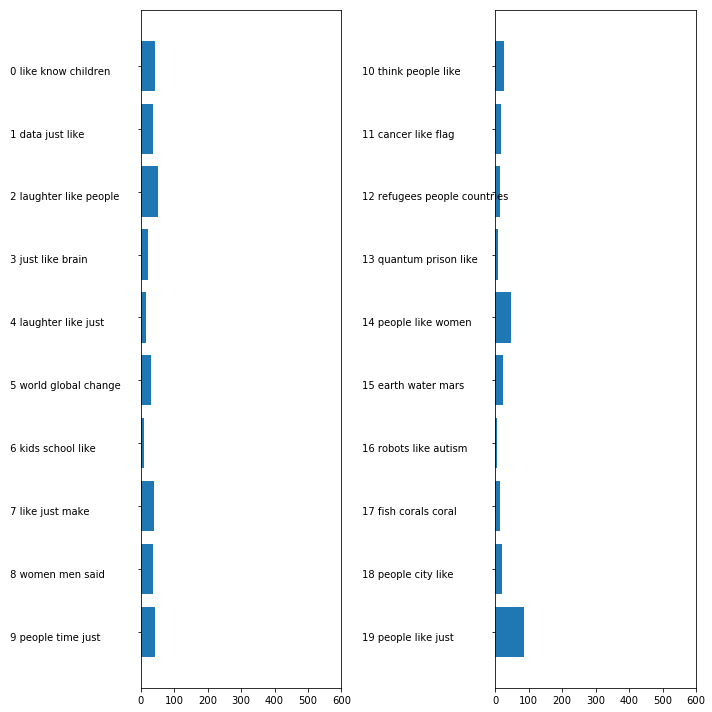

In [44]:
#全文書に対するトピックの重み
#ラベルはトピックの主要な重要語
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :3]])]
for col in [0, 1]:
    start = col * 10
    end = (col + 1) * 10
    ax[col].barh(np.arange(10), np.sum(doc_topics, axis=0)[start:end])
    ax[col].set_yticks(np.arange(10))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 600)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

In [48]:
#トピック10への関連度でテキストを並び替え
doc_topic = np.argsort(doc_topics[:, 10])[::-1]
#トピック10に最も関連しているトップ5の文書の先頭の数文を表示
for i in doc_topic[:5]:
    print("doc id: {}".format(i))
    print(review_text[i])
    print("\n")

doc id: 269
Chris Anderson: Hello.
Welcome to this TED Dialogues. It's the first of a series
that's going to be done in response to the current
political upheaval. I don't know about you; I've become quite concerned about
the growing divisiveness in this country and in the world. No one's listening to each other. Right? They aren't. I mean, it feels like we need
a different kind of conversation, one that's based on -- I don't know,
on reason, listening, on understanding, on a broader context. That's at least what we're going to try
in these TED Dialogues, starting today. And we couldn't have anyone with us who I'd be more excited to kick this off. This is a mind right here that thinks
pretty much like no one else on the planet, I would hasten to say. I'm serious. (Yuval Noah Harari laughs) I'm serious. He synthesizes history
with underlying ideas in a way that kind of takes
your breath away. So, some of you will know
this book, "Sapiens." Has anyone here read "Sapiens"? (Applause) I me